## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


boston = datasets.load_boston()
X = pd.DataFrame(boston.data, columns = boston.feature_names)
y = pd.DataFrame(boston.target, columns = ['MEDV'])

In [2]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [5]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MEDV    506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


In [6]:
X.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [7]:
y.isna().sum()

MEDV    0
dtype: int64

In [59]:
df_cor = pd.concat([X,y], axis = 1)

In [60]:
df_cor.corr() # Matrix de Correlação

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


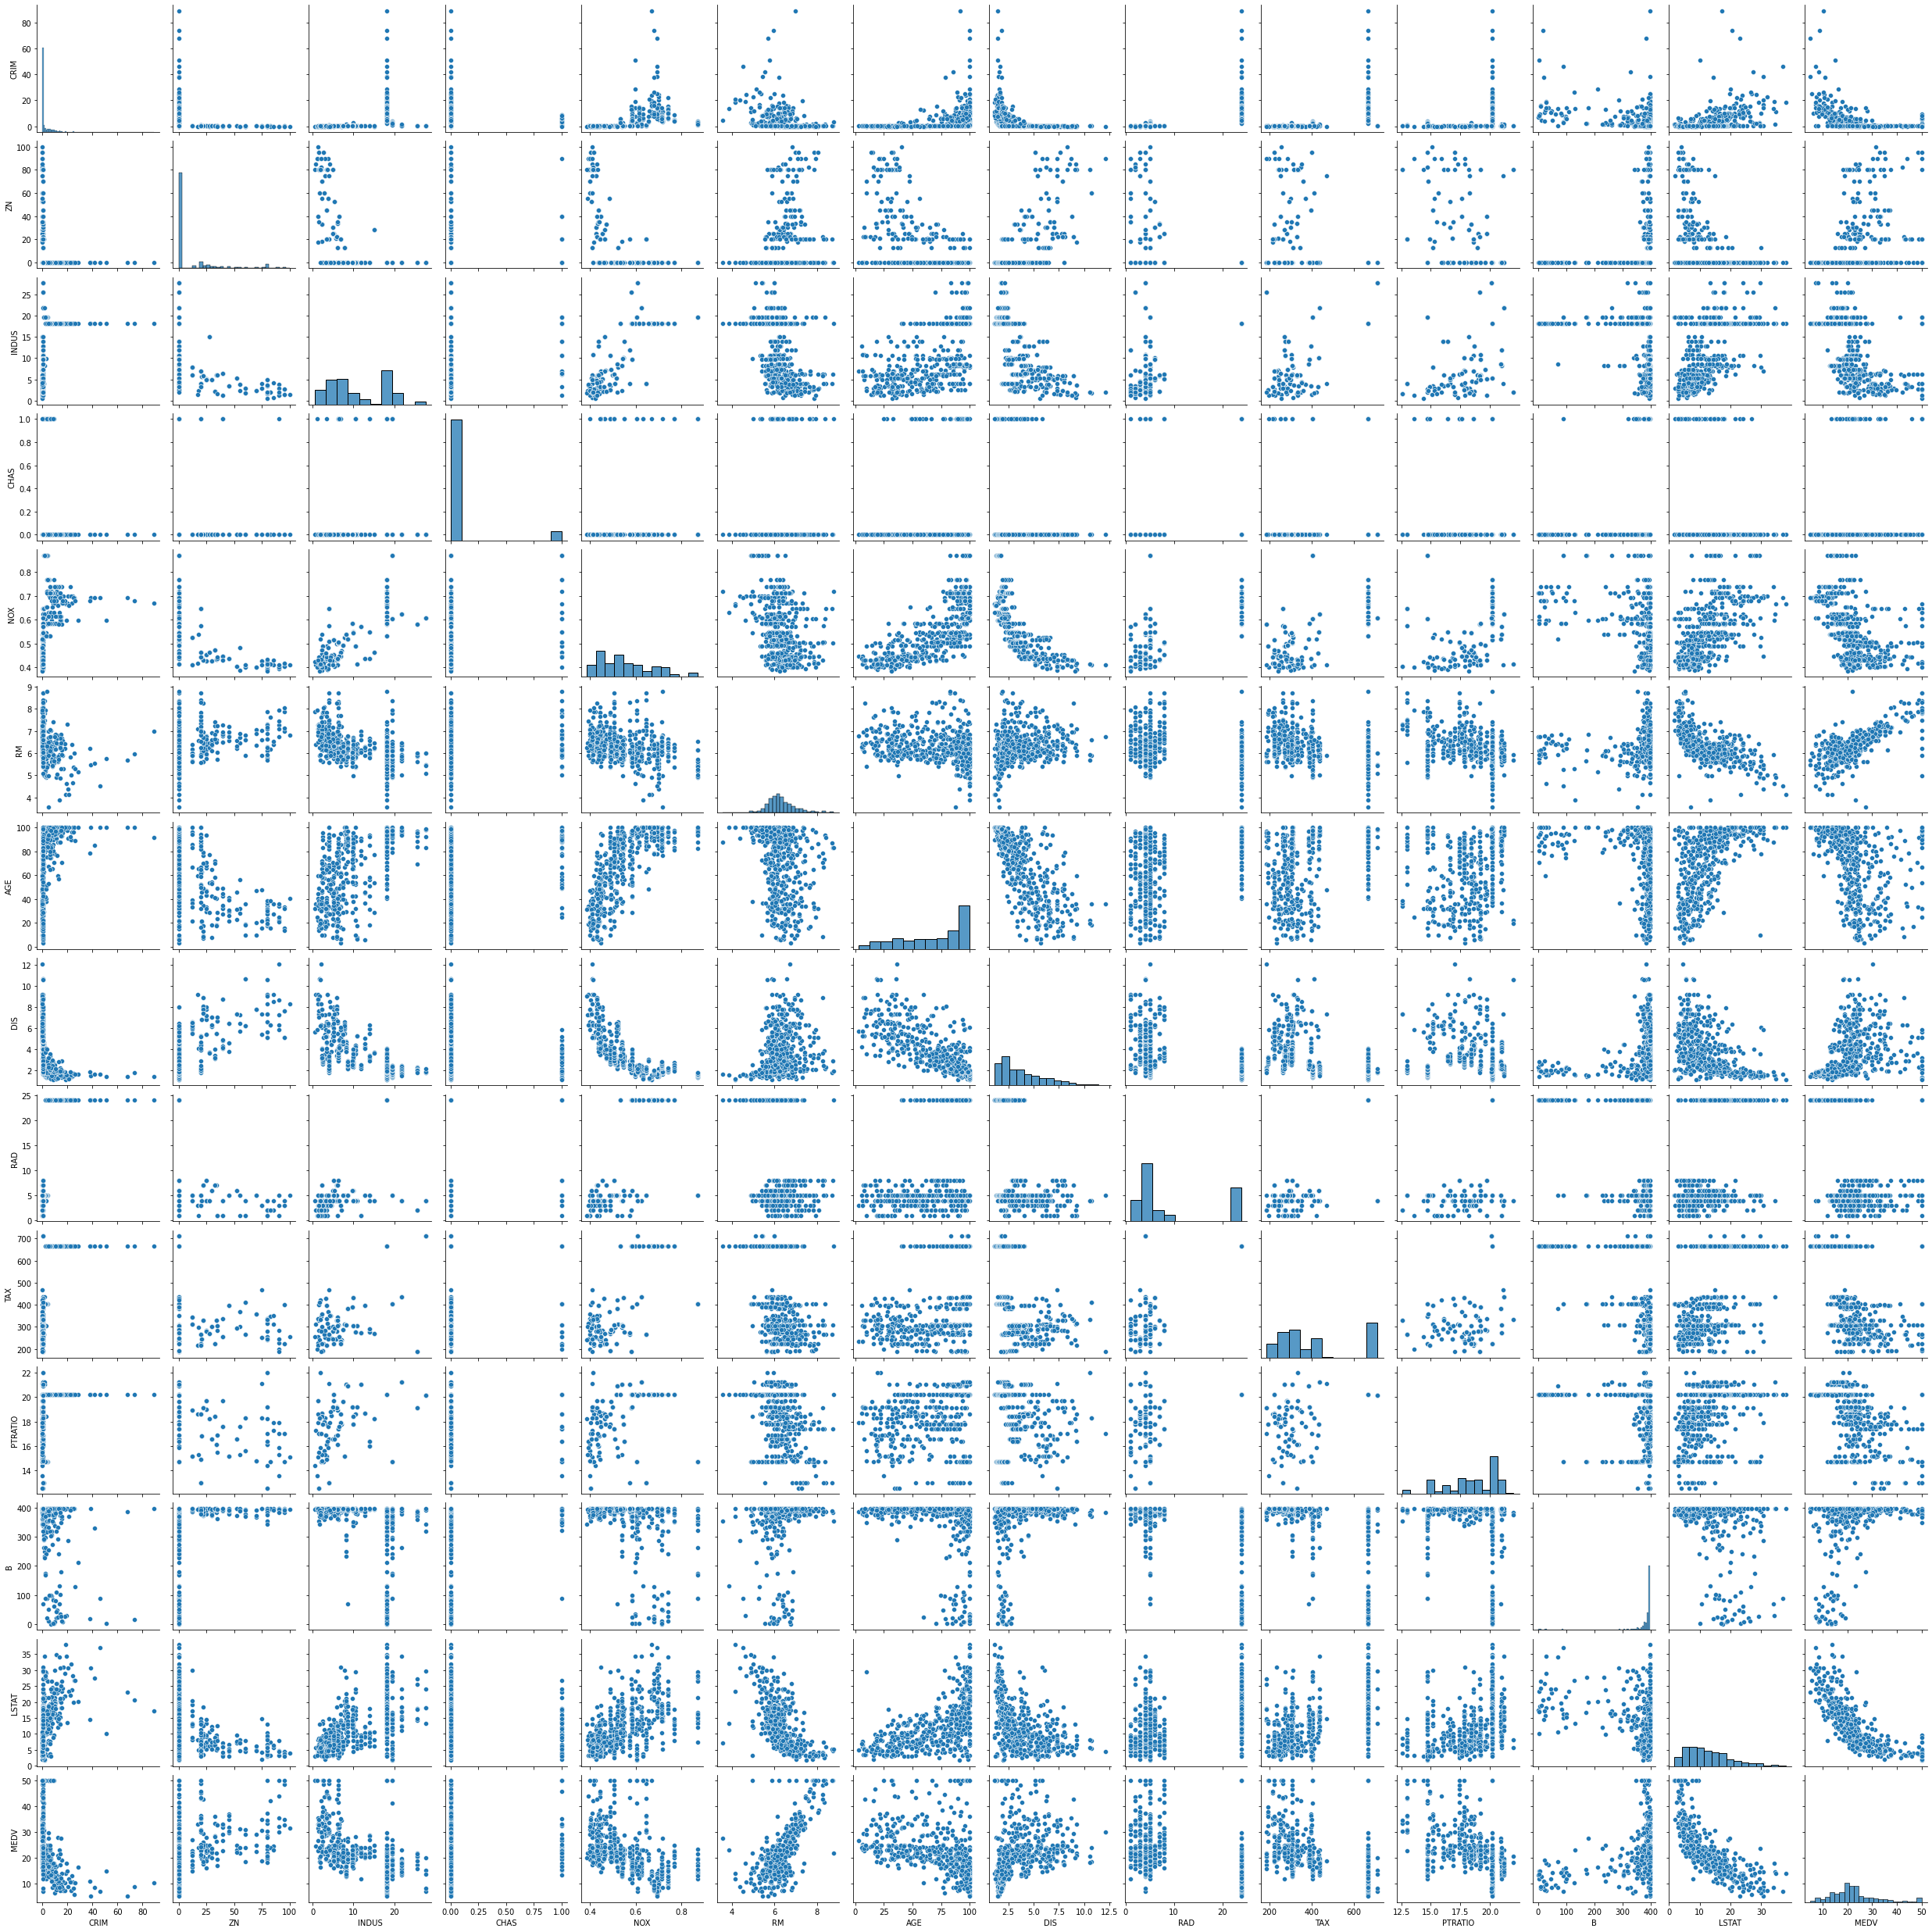

In [11]:
sns.pairplot(df_cor) # Matriz de Dispersão

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, train_size = 0.7, random_state=1000)

In [13]:
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=8)

regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8)

In [14]:
# OBS: de acordo com a Aula 1, parte V, o professor Juca (João Melo) redenomina o que MSE da fórmula abaixo
# para R-quadrado. Isto porque o método score retorna o coeficiente de derteminação da árvore.

mse1 = regr_1.score(X_train, y_train)
mse2 = regr_2.score(X_train, y_train)

template = "O R-quadrado para a base treinamento da árvore com profundidade={0} é: {1:.2f}"

print(template.format(regr_1.get_depth(),mse1).replace(".",","))
print(template.format(regr_2.get_depth(),mse2).replace(".",","))


mse1 = regr_1.score(X_test, y_test)
mse2 = regr_2.score(X_test, y_test)

template = "O R-quadrado para a base de teste da árvore com profundidade={0} é: {1:.2f}"

print(template.format(regr_1.get_depth(),mse1).replace(".",","))
print(template.format(regr_2.get_depth(),mse2).replace(".",","))


O R-quadrado para a base treinamento da árvore com profundidade=2 é: 0,73
O R-quadrado para a base treinamento da árvore com profundidade=8 é: 0,98
O R-quadrado para a base de teste da árvore com profundidade=2 é: 0,58
O R-quadrado para a base de teste da árvore com profundidade=8 é: 0,59


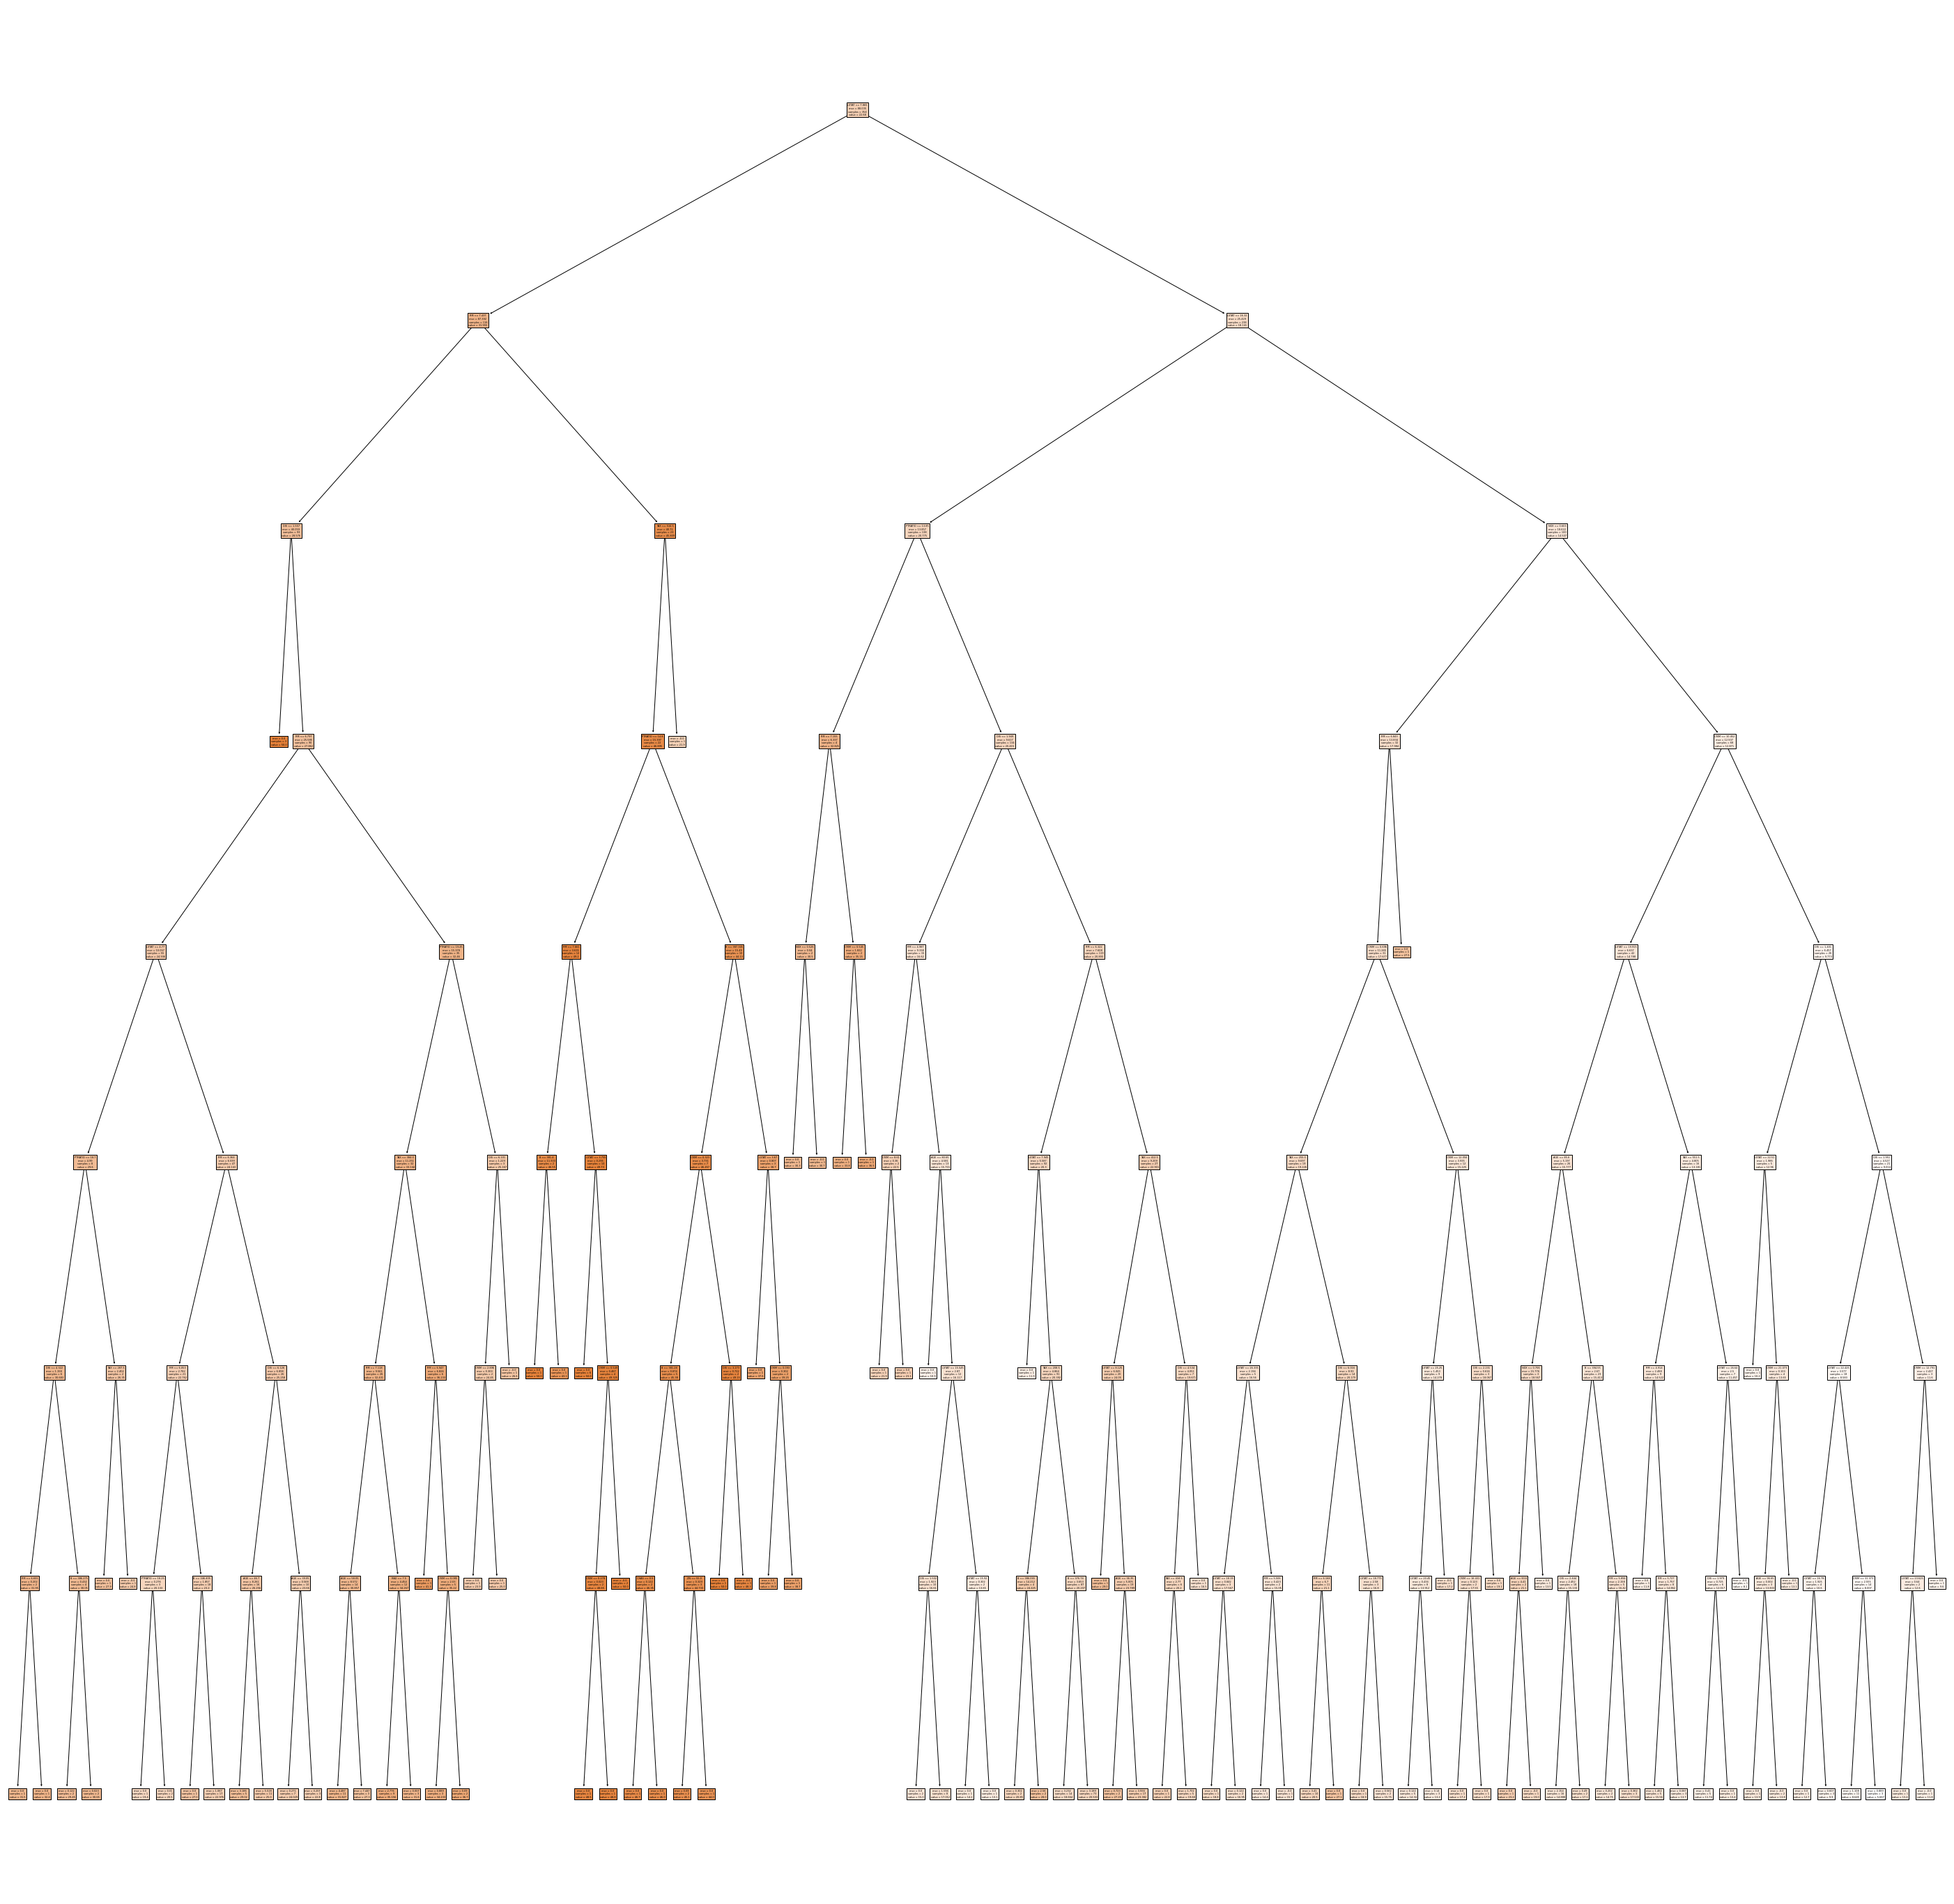

In [15]:
plt.figure(figsize=[50, 50])
tp = tree.plot_tree(regr_2, 
                    feature_names=X.columns,  
                    filled=True) 

In [16]:
representacao_textual = tree.export_text(regr_2)
print(representacao_textual)

|--- feature_12 <= 7.87
|   |--- feature_5 <= 7.44
|   |   |--- feature_7 <= 1.56
|   |   |   |--- value: [50.00]
|   |   |--- feature_7 >  1.56
|   |   |   |--- feature_5 <= 6.80
|   |   |   |   |--- feature_12 <= 4.77
|   |   |   |   |   |--- feature_10 <= 18.70
|   |   |   |   |   |   |--- feature_7 <= 4.32
|   |   |   |   |   |   |   |--- feature_5 <= 6.65
|   |   |   |   |   |   |   |   |--- value: [31.50]
|   |   |   |   |   |   |   |--- feature_5 >  6.65
|   |   |   |   |   |   |   |   |--- value: [32.40]
|   |   |   |   |   |   |--- feature_7 >  4.32
|   |   |   |   |   |   |   |--- feature_11 <= 386.27
|   |   |   |   |   |   |   |   |--- value: [29.45]
|   |   |   |   |   |   |   |--- feature_11 >  386.27
|   |   |   |   |   |   |   |   |--- value: [30.65]
|   |   |   |   |   |--- feature_10 >  18.70
|   |   |   |   |   |   |--- feature_9 <= 287.50
|   |   |   |   |   |   |   |--- value: [27.90]
|   |   |   |   |   |   |--- feature_9 >  287.50
|   |   |   |   |   |   |   |---

In [33]:
regr_2 = DecisionTreeRegressor(max_depth=8, min_samples_leaf=10)

regr_2.fit(X_train, y_train)

mse2 = regr_2.score(X_test, y_test)
mse2

0.6090359388440337

n_minimo,2,3,4,5,6,7,8,9
profundidade,,,,,,,,
2,0.583152,0.583152,0.583152,0.583152,0.583152,0.583152,0.583152,0.583152
3,0.577742,0.568074,0.597780,0.630706,0.630706,0.630706,0.630706,0.630706
4,0.574140,0.564481,0.578890,0.602645,0.583178,0.586846,0.588349,0.589914
5,0.567911,0.587206,0.626485,0.622974,0.616750,0.618648,0.618306,0.620802
6,0.594561,0.595976,0.618638,0.617933,0.616516,0.617774,0.605919,0.609916
7,0.613451,0.602303,0.622984,0.664415,0.605790,0.614798,0.604000,0.608132
8,0.589814,0.594297,0.620892,0.622362,0.616198,0.621706,0.611190,0.615580


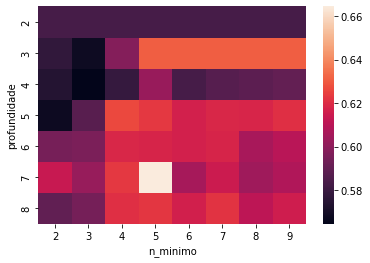

In [34]:
mses = []
ind_i = []
ind_j = []

for i in range(2, 9):
    for j in range(2, 10):
        regr_2 = DecisionTreeRegressor(max_depth=i, min_samples_leaf=j)
        regr_2.fit(X_train, y_train)
        mse2 = regr_2.score(X_test, y_test)
        mses.append(mse2)
        ind_i.append(i)
        ind_j.append(j)
        
df_mse = pd.DataFrame({'mses':mses, 'profundidade':ind_i, 'n_minimo':ind_j})
sns.heatmap(df_mse.pivot(index='profundidade', columns='n_minimo', values='mses'))
df_mse.pivot(index='profundidade', columns='n_minimo', values='mses')

### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [35]:
path = regr_2.cost_complexity_pruning_path(X_train, y_train)
path

{'ccp_alphas': array([0.00000000e+00, 2.37486536e-02, 4.01909679e-02, 5.14667444e-02,
        5.16102480e-02, 5.31210292e-02, 6.64411126e-02, 7.50941976e-02,
        9.29853801e-02, 9.48349751e-02, 9.67456306e-02, 1.67354005e-01,
        1.88512765e-01, 1.93944658e-01, 2.03778681e-01, 2.23056512e-01,
        2.43882275e-01, 2.50122383e-01, 3.95306196e-01, 5.43663127e-01,
        8.44885232e-01, 1.14092083e+00, 1.32005173e+00, 1.34975674e+00,
        1.60746253e+00, 1.92791408e+00, 3.55087525e+00, 6.43437892e+00,
        1.54681589e+01, 4.22716119e+01]),
 'impurities': array([ 9.03343946,  9.05718811,  9.09737908,  9.14884582,  9.20045607,
         9.2535771 ,  9.32001821,  9.39511241,  9.48809779,  9.58293277,
         9.6796784 ,  9.8470324 , 10.03554517, 10.22948983, 10.43326851,
        10.65632502, 10.9002073 , 11.15032968, 11.54563587, 12.089299  ,
        12.93418423, 14.07510507, 15.39515679, 16.74491354, 18.35237607,
        20.28029015, 23.83116539, 30.26554432, 45.73370326, 8

Text(0, 0.5, 'Impureza total das folhas')

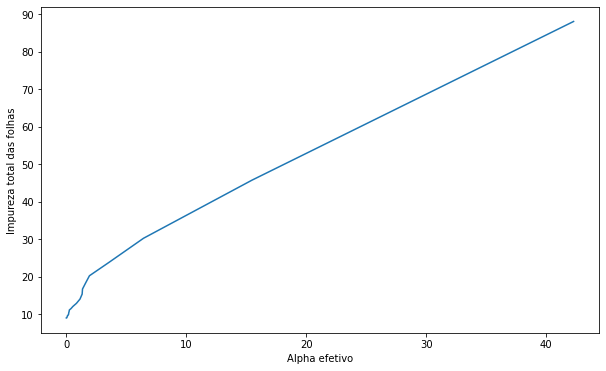

In [36]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel("Alpha efetivo")
plt.ylabel("Impureza total das folhas")

### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [37]:
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

Text(0, 0.5, 'Profundidade da árvore')

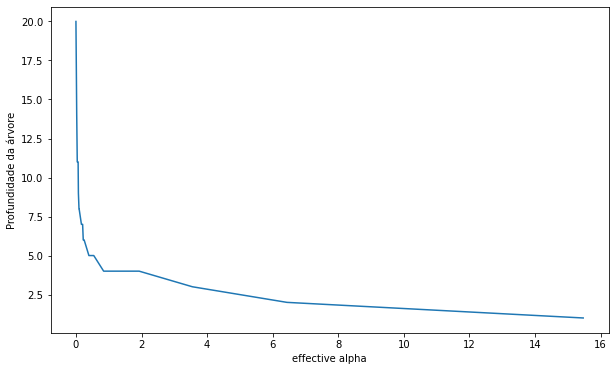

In [38]:
tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.plot(ccp_alphas[:-1], tree_depths[:-1])
plt.xlabel("effective alpha")
plt.ylabel("Profundidade da árvore")

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [44]:
train_scores = [mean_squared_error(y_train , clf.predict(X_train)) for clf in clfs]
test_scores  = [mean_squared_error(y_test  , clf.predict(X_test )) for clf in clfs]
 
print(train_scores)
print()
print(test_scores)

[0.0, 1.1040144954082545, 1.5397926793241503, 1.7123413998952413, 1.7123413998952413, 1.8170799366253034, 2.405305964050483, 3.129891186885929, 3.732552321364023, 3.732552321364023, 3.732552321364023, 4.875454058427645, 5.05306264475657, 5.433782339921947, 5.635294725841113, 6.251018942097469, 6.476406165044014, 6.476406165044014, 7.710859529160913, 9.00314110137149, 10.265468520906076, 11.406389354254626, 11.406389354254626, 11.406389354254626, 11.406389354254626, 16.391796230172023, 19.811910023472254, 30.265544317647034, 45.73370325804196, 88.00531520316638]

[33.302434210526314, 31.079911234617658, 30.75240421667515, 31.127559101378772, 31.127559101378772, 31.267886589019675, 29.725860417332736, 30.32108816387721, 30.199310779157283, 30.199310779157283, 30.199310779157283, 30.336704212816908, 30.395447335469264, 31.68723793795272, 31.087396766977943, 31.400863597408883, 30.382054254525045, 30.382054254525045, 30.755329047759584, 31.6940520965478, 27.870954334836796, 28.246196958113

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

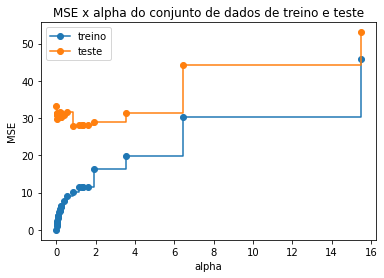

In [45]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("MSE")
ax.set_title("MSE x alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas[:-1], train_scores[:-1], marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas[:-1], test_scores[:-1], marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()


### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [56]:
arvore_final = DecisionTreeRegressor(random_state = 0, ccp_alpha = 1.5)
arvore_final.fit(X_train, y_train)

print(f"Profundidade:{arvore_final.tree_.max_depth}")
print(f"R-quadrado na base de teste: {arvore_final.score(X_test, y_test):.2f}")
print(f"MSE na base de teste: {mean_squared_error(y_test, arvore_final.predict(X_test )):.2f}")

Profundidade:4
R-quadrado na base de teste: 0.63
MSE na base de teste: 28.25


### 7. Visualize esta árvore.

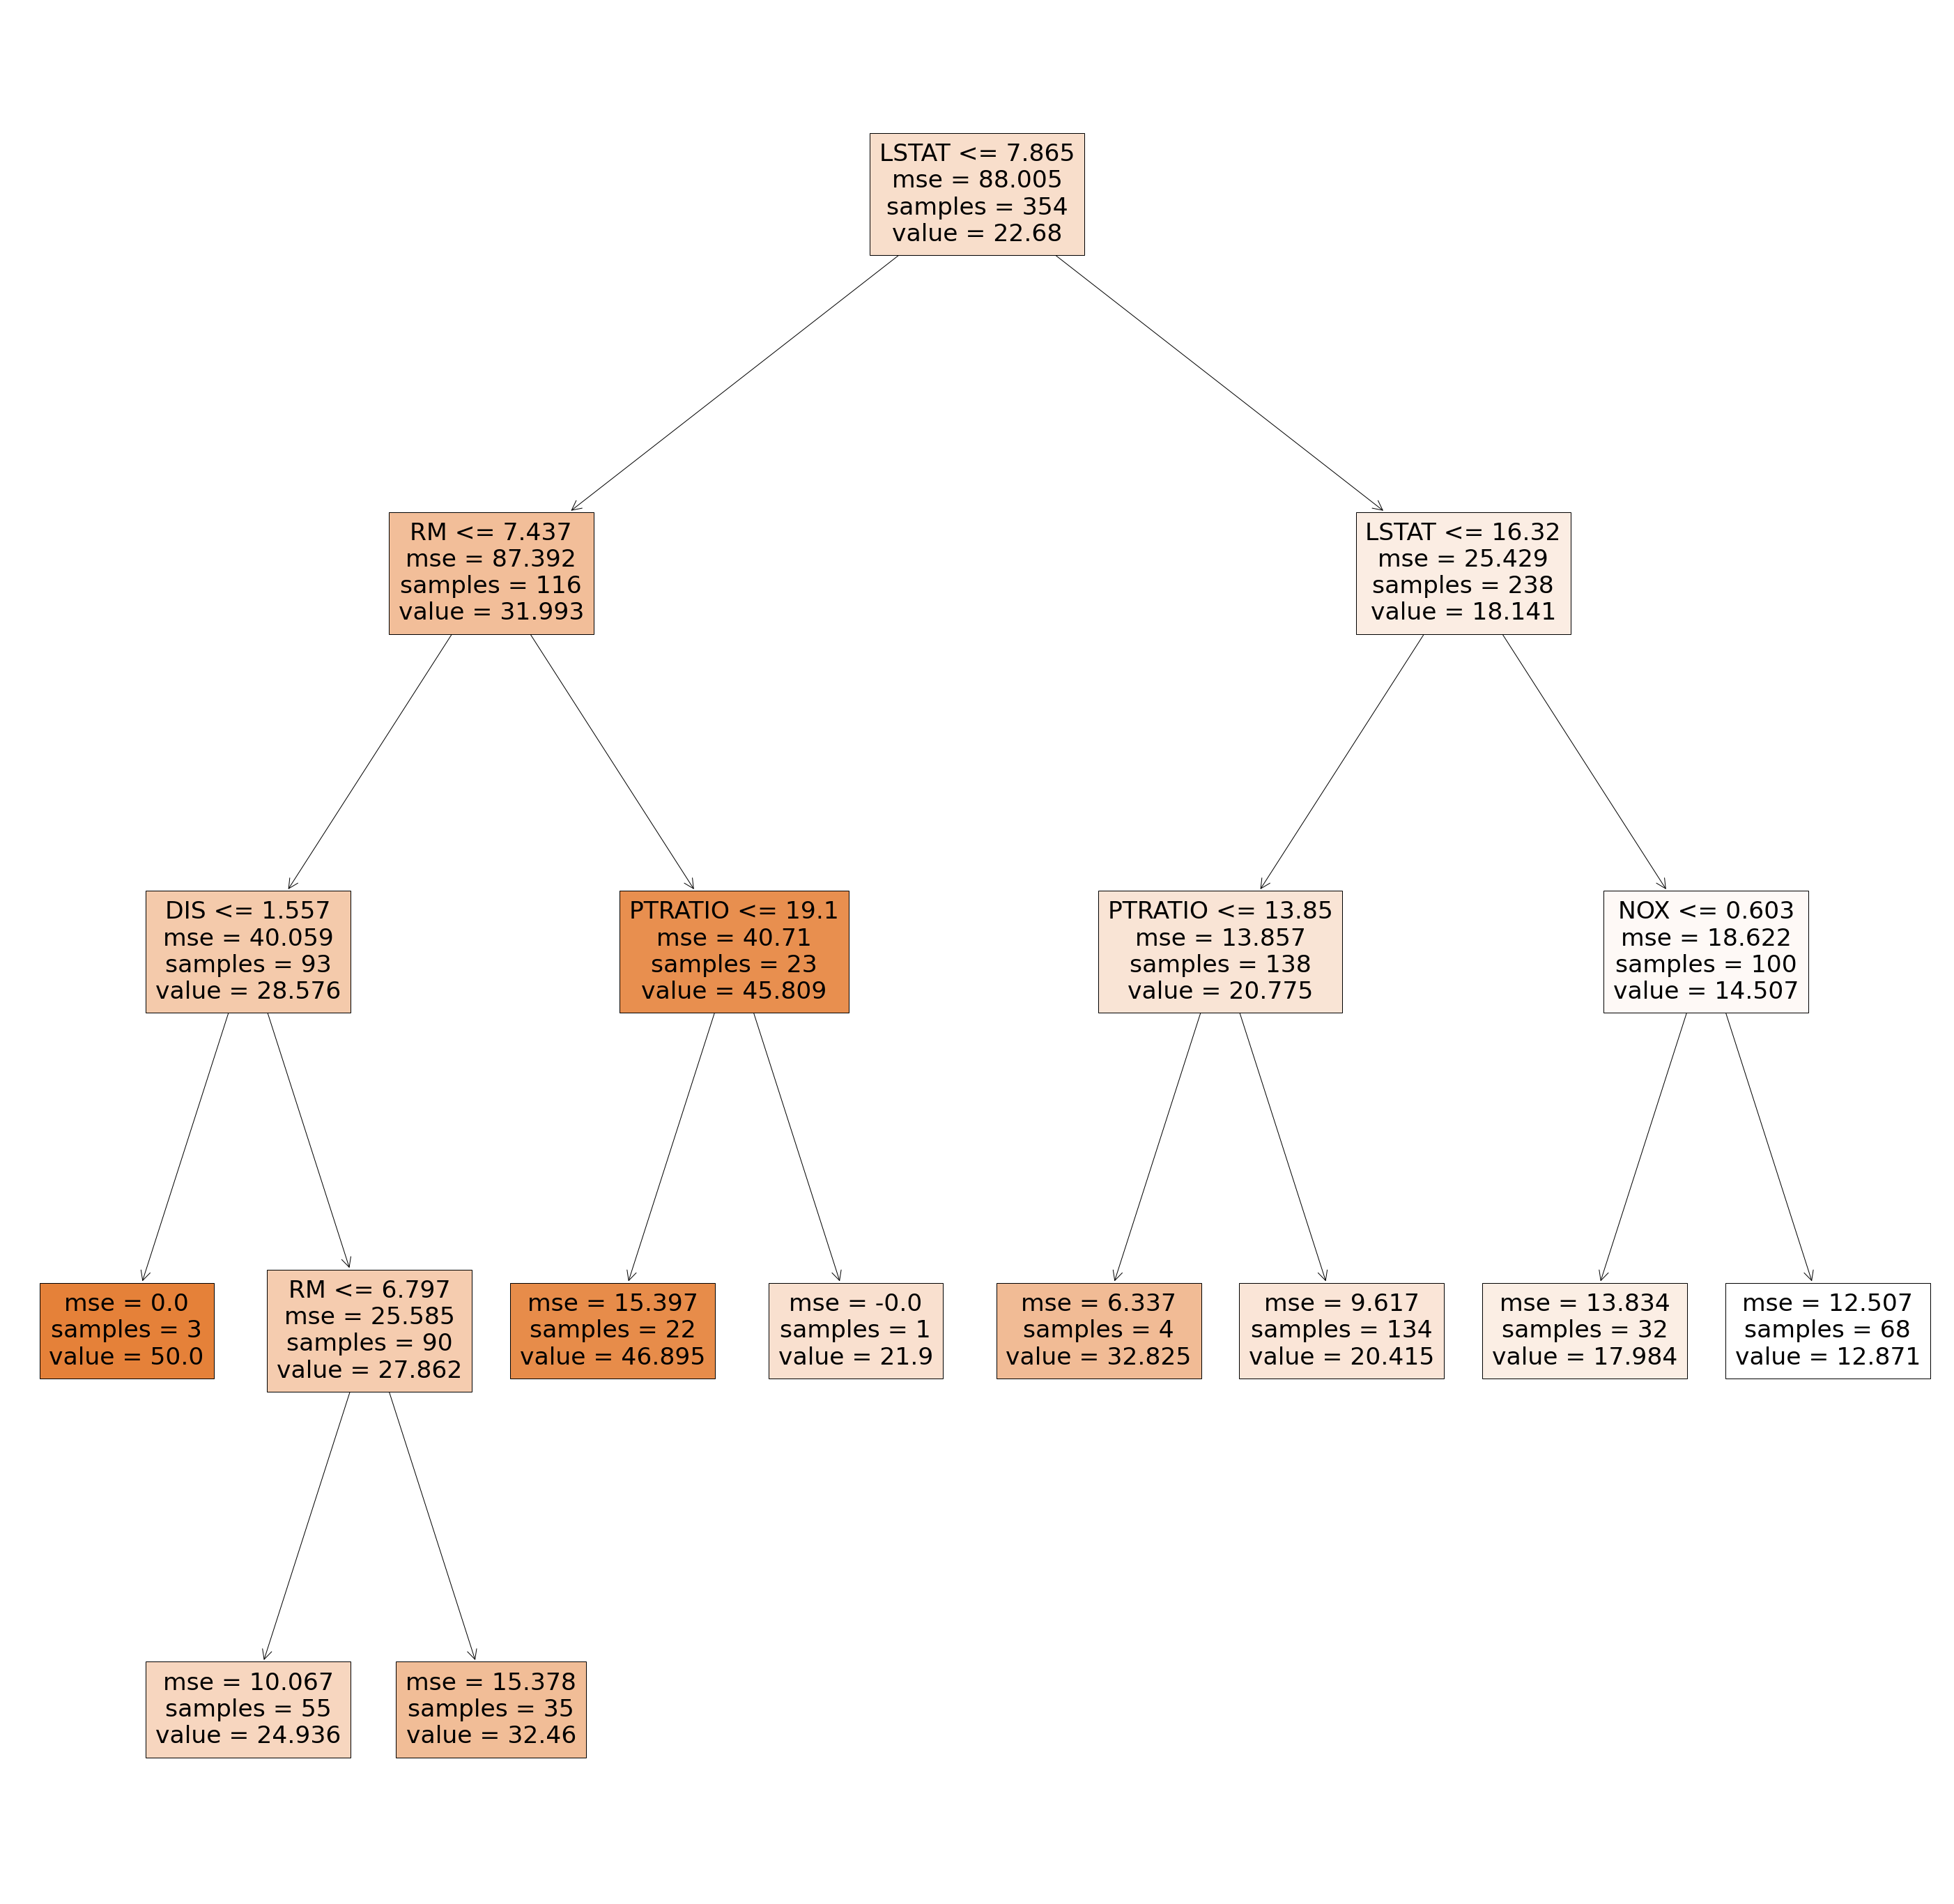

In [57]:
plt.figure(figsize=[50, 50])
tp = tree.plot_tree(arvore_final, 
                    feature_names=X.columns,  
                    filled=True) 